In [87]:
#!g2.mig
%pwd

'/home/jupyter/work/resources/nlp-coursework'

In [6]:
#!g2.mig
%cd ../../..

/home/jupyter/work/resources/nlp-coursework


In [126]:
#!g2.mig
import dill
from IPython.display import clear_output

from datasets_ import DatasetLoader
from src.nlp.application import BertEmbedder, ReviewDataset

from torch.utils.data import Dataset, DataLoader

import numpy as np
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
#!g2.mig
with open('clf', 'rb') as f:
    clf = dill.load(f)

In [90]:
#!g2.mig
train, test = DatasetLoader.load_reviews_Review_Label_dataset(
    train_test_split=True,
    classnames_to_int=True,
    remove_neutral_class=True,
    show_path=True,
    
)

train.label[train['label'] == 2] = 1
test.label[test['label'] == 2] = 1

data/reviews_Review_Label/reviews_Review_Label.csv
Dataset 'reviews_Review_Label.csv' was found in local storage.


In [91]:
#!g2.mig
train

,review,label
54700,Фильму не стоило бы выходить за пределы Велико...,0
67873,Это один из самых впечатляющих и по-настоящему...,1
44030,Первая часть 'Чужих' в свое время произвела на...,1
21503,История начинающего барабанщика Эндрю зародила...,1
75163,Ну вот мы и дождались. В прокат вышла новая ки...,1
...,...,...
6265,Всем нам в равной мере свойственно как злорадс...,0
54886,"Даже в таком неординарном фильме. Да, я уверен...",1
76820,"Я не был сильно заинтересован 'Дэдпулом', одна...",1
860,"Фильм, который неизменно занимает первые места...",1


In [92]:
#!g2.mig
reviews = DatasetLoader.load_reviews(
    show_path=True
)

data/reviews.csv
Dataset 'reviews.csv' was found in local storage.


In [93]:
#!g2.mig
reviews

,review,kinopoiskId,type,date,positiveRating,negativeRating,author,title,film_id
0,«Зеленую милю» я смотрела два раза: 10 лет наз...,3221833,NEUTRAL,2023-01-28T20:58:59,4,7,Yanchessa,NaN,435
1,Период конца девяностых годов-начало двухтысяч...,3146204,POSITIVE,2022-05-06T09:26:39,13,2,Fozzy,Магия или реальность,435
2,"Очень сложно писать рецензию на этот фильм, та...",3120334,POSITIVE,2022-01-24T21:36:34,21,2,Denis2oo3,"Что происходит на миле, остается на миле",435
3,Любимая многими миллионами ценителями киноиску...,3104371,POSITIVE,2021-12-19T09:09:50,10,2,kingwayne,Живи долго и счастливо!,435
4,В нашем мире существует много разных фильмов. ...,3096653,POSITIVE,2021-12-01T05:31:18,18,2,Юлия Березина - 1765,Шедевр!,435
...,...,...,...,...,...,...,...,...,...
90641,"Конечно, этот фильм - не лучший представитель ...",3214923,POSITIVE,2023-01-09T20:54:53,6,6,drakefake,Учимся видеть хорошее,969760
90642,Фильм «Ламборгини: Человек-легенда» снят в 202...,3214599,NEGATIVE,2023-01-09T01:55:11,3,1,Georgy_Olegovich,Марксисткий пасквиль против Ламборгини,969760
90643,"Эй, рагацци, вы это серьёзно, ТАК показывать и...",3211347,NEGATIVE,2022-12-29T19:07:13,48,4,Rosinanto,Американизированная версия итальянской биографии.,969760
90644,"Вообще, говоря о байопиках, стоит отметить, чт...",3209833,NEGATIVE,2022-12-24T19:23:18,72,7,Павел - 5699,Унылая повесть про яркую личность,969760


In [129]:
#!g2.mig
mapping = DatasetLoader.load_films_Id_Title_Year_dataset(show_path=True)
mapping

data/films_Id_Title_Year.csv
Dataset 'films_Id_Title_Year.csv' was found in local storage.


,id,title,year
0,435,Зеленая миля,1999
1,329,Список Шиндлера,1993
2,326,Побег из Шоушенка,1994
3,32898,Достучаться до небес,1997
4,448,Форрест Гамп,1994
...,...,...,...
798,75871,Олдбой,2003
799,976636,Большая игра,2017
800,81288,Трансформеры,2007
801,5047485,Один настоящий день,2022


In [37]:
#!g2.mig
clf.model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(119547, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [83]:
#!g2.mig
dataset = ReviewDataset(train.review[:100], clf.tokenizer)

dataloader = DataLoader(dataset, batch_size=16, shuffle=True)

In [84]:
#!g2.mig
embd = BertEmbedder(clf.model, clf.tokenizer, None)

In [85]:
#!g2.mig
out = embd.build(dataloader)

  0%|                                                                         | 0/7 [00:00<?, ?it/s]

In [86]:
#!g2.mig
out

SequenceClassifierOutput(loss=None, logits=tensor([[-0.3214,  0.0188, -0.2751,  ...,  0.5539, -0.6354, -0.1104],
        [-0.2654,  0.2624, -0.5865,  ...,  0.7234, -0.4271, -0.2438],
        [-0.1671,  0.0826, -0.1631,  ...,  0.6575, -0.2144, -0.0457],
        ...,
        [-0.1449, -0.6294,  0.4609,  ...,  0.2249, -0.4905,  0.5095],
        [-0.1168, -0.2490, -0.0268,  ...,  0.5215, -0.2771,  0.2332],
        [-0.0426,  0.0656, -0.2359,  ...,  0.4591, -0.1624, -0.0976]],
       device='cuda:0'), hidden_states=None, attentions=None)

In [75]:
#!g2.mig
film_embeddings.shape

(100, 768)

In [76]:
#!g2.mig
film_embeddings[0].shape

(768,)

In [77]:
#!g2.mig
film_embeddings[0]

array([-7.85372332e-02,  5.54053009e-01, -5.08215427e-01,  9.78825808e-01,
        1.35898376e-02,  9.92954075e-02, -1.13604724e-01, -3.18637908e-01,
       -7.02571273e-02, -1.65174767e-01,  5.19459367e-01,  3.02039891e-01,
        2.41261795e-01,  8.33574310e-02, -3.22506040e-01, -4.07679439e-01,
        8.62533092e-01, -3.48892391e-01, -3.84454429e-01,  1.47362426e-01,
       -9.15330648e-01,  3.16406161e-01,  2.73671120e-01,  2.69512177e-01,
        4.38186377e-01, -6.77700564e-02,  1.55991852e-01, -7.53167272e-02,
       -3.33716094e-01,  5.66927195e-01, -4.50890511e-01, -5.76304078e-01,
       -9.47081208e-01,  6.67591572e-01, -5.06994009e-01,  4.25760627e-01,
       -2.04419851e-01, -7.22227320e-02, -1.61930442e-01, -1.41173482e-01,
        4.17104483e-01, -3.51656973e-01,  2.12743685e-01, -4.03262258e-01,
        3.22828114e-01, -9.49573237e-03,  3.69645238e-01, -3.92088652e-01,
        2.89188266e-01, -4.26245600e-01,  3.70904744e-01, -5.95330410e-02,
       -3.08279246e-01, -

In [94]:
#!g2.mig

%%time

embd = BertEmbedder(clf.model, clf.tokenizer, None)

all_embeddings = np.array([])
uids = reviews.film_id.unique()

for i, film_id in enumerate(uids):
    print(f'{i+1} / {len(uids)}')
    df = reviews[reviews.film_id == film_id].review
    dataset = ReviewDataset(df, clf.tokenizer)
    dataloader = DataLoader(dataset, batch_size=16, shuffle=True)
    
    embeddings = embd.build(dataloader)
    aggregated = embeddings.mean(axis=0)
    
    all_embeddings = np.append(all_embeddings, aggregated)
    
    clear_output()

all_embeddings = all_embeddings.reshape(i+1, -1)

CPU times: user 20min 42s, sys: 12min 40s, total: 33min 22s
Wall time: 32min 41s


In [95]:
#!g2.mig
all_embeddings.shape

(803, 768)

In [ ]:
#!g2.mig
all_embeddings

(803, 803)


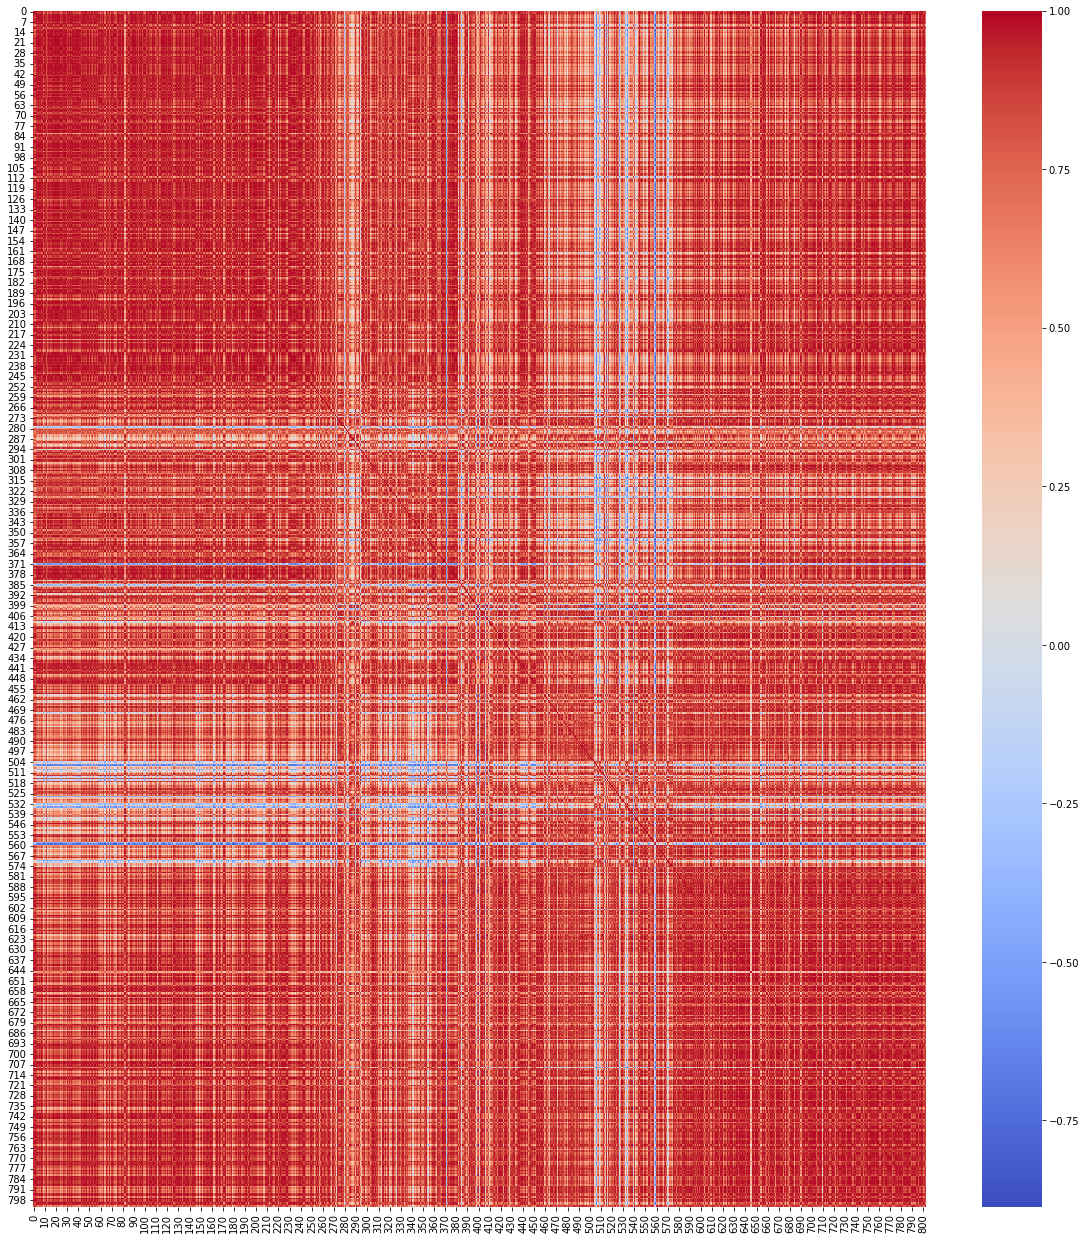

In [127]:
#!g2.mig
D = cosine_similarity(all_embeddings)
print(D.shape)

plt.figure(figsize=(20, 22))
sns.heatmap(D, cmap='coolwarm')
plt.show()

In [106]:
#!g2.mig
D

array([[0.        , 0.02894406, 0.01075497, ..., 0.07493159, 0.0425357 ,
        0.18856633],
       [0.02894406, 0.        , 0.05008165, ..., 0.15862105, 0.11442202,
        0.08284883],
       [0.01075497, 0.05008165, 0.        , ..., 0.05549408, 0.03101215,
        0.21854563],
       ...,
       [0.07493159, 0.15862105, 0.05549408, ..., 0.        , 0.05667748,
        0.37193314],
       [0.0425357 , 0.11442202, 0.03101215, ..., 0.05667748, 0.        ,
        0.3204952 ],
       [0.18856633, 0.08284883, 0.21854563, ..., 0.37193314, 0.3204952 ,
        0.        ]])

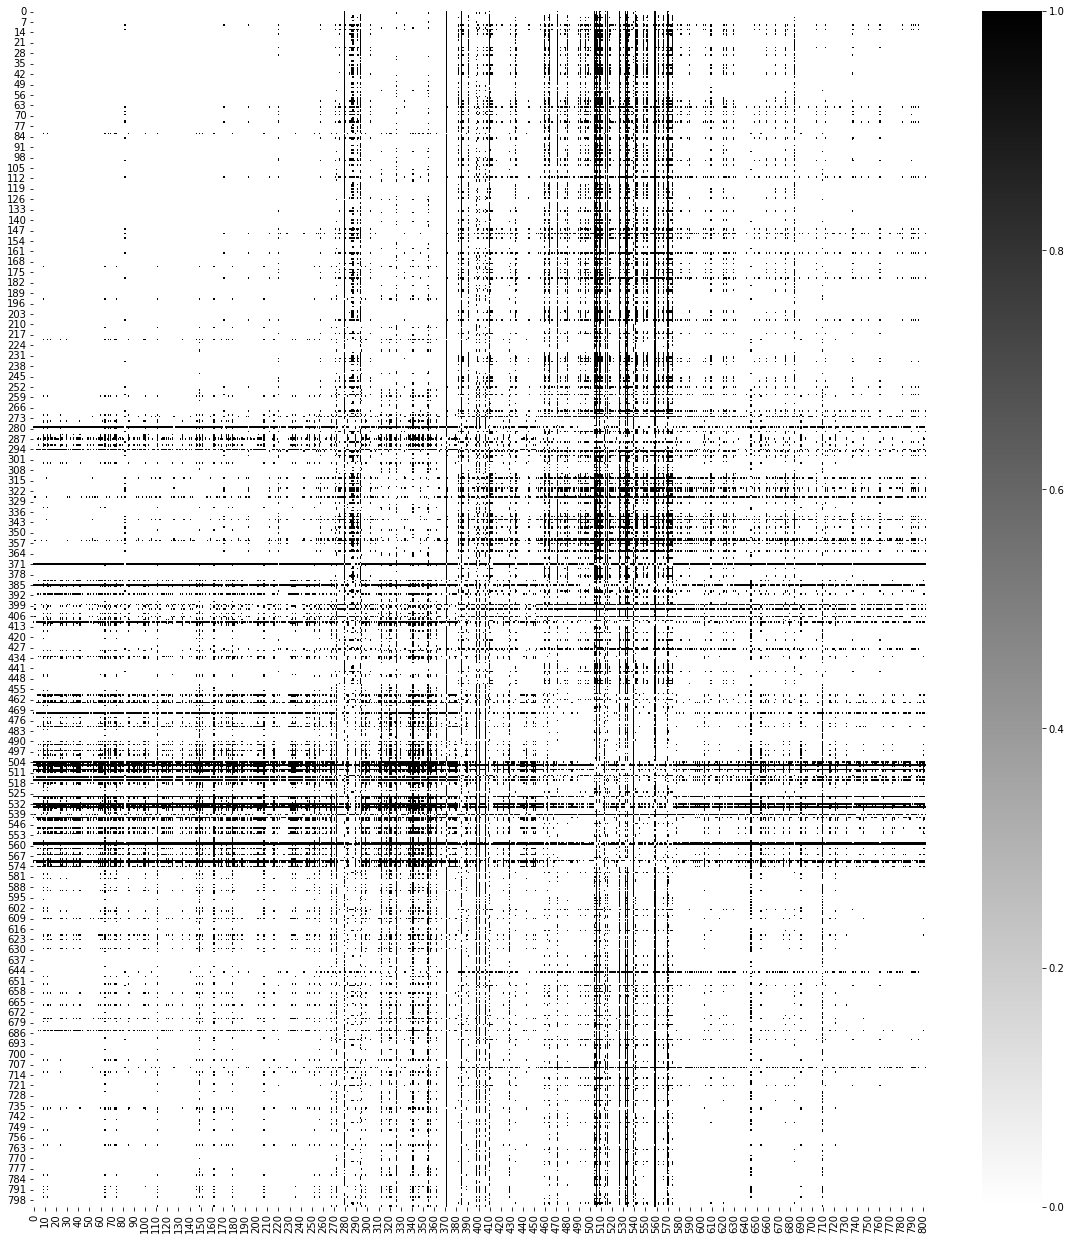

In [122]:
#!g2.mig
plt.figure(figsize=(20, 22))
sns.heatmap(D > 0.7, cmap='binary')
plt.show()

In [153]:
#!g2.mig
threshold = 0.99

for i, stat in enumerate(cosine_similarity(all_embeddings)):
    print(mapping[mapping.id == uids[i]].iloc[0].title)
    for j in np.where(stat > threshold)[0]:
        print('\t\t', mapping[mapping.id == uids[j]].iloc[0].title)

Зеленая миля
		 Зеленая миля
		 Темный рыцарь
		 Остров проклятых
		 ...А зори здесь тихие
		 Гарри Поттер и Кубок огня
		 Семь жизней
		 Шоу Трумана
		 Гарри Поттер и Орден Феникса
		 Гарри Поттер и Дары Смерти: Часть I
		 Игра
		 Жестокий романс
		 Ирония судьбы, или С легким паром!
		 Алиса в Зазеркалье
		 Аладдин
		 До встречи с тобой
		 Очень страшное кино
		 Милые кости
		 Родные
		 Великий Гэтсби
		 Каникулы
		 Дэдпул
Список Шиндлера
		 Список Шиндлера
		 Судьба человека
		 Пианист
		 Волк с Уолл-стрит
		 Семь
		 Спасти рядового Райана
Побег из Шоушенка
		 Побег из Шоушенка
		 Тайна Коко
		 Криминальное чтиво
		 Темный рыцарь
		 Остров проклятых
		 Джентльмены
		 Джанго освобожденный
		 Крестный отец
		 Одержимость
		 Престиж
		 На войне как на войне
		 Маленький принц
		 Сестрёнка
		 Молчание ягнят
		 Хоббит: Пустошь Смауга
		 Человек-паук: Через вселенные
		 Покровские ворота
		 Не может быть!
		 Игра
		 Изгой
		 Стражи Галактики
		 Аты-баты, шли солдаты...
		 О чём говорят му